In [29]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [30]:
# dataset_url = "dataset/"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path("dataset/")

In [31]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total no. of images: ", image_count)

Total no. of images:  300


In [32]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [33]:
class_names = train_ds.class_names
print("Class Names :", class_names)

Class Names : ['jahe', 'kunyit', 'lengkuas']


In [34]:
# train_ds = train_ds.cache().shuffle(1000)
# val_ds = val_ds.cache()

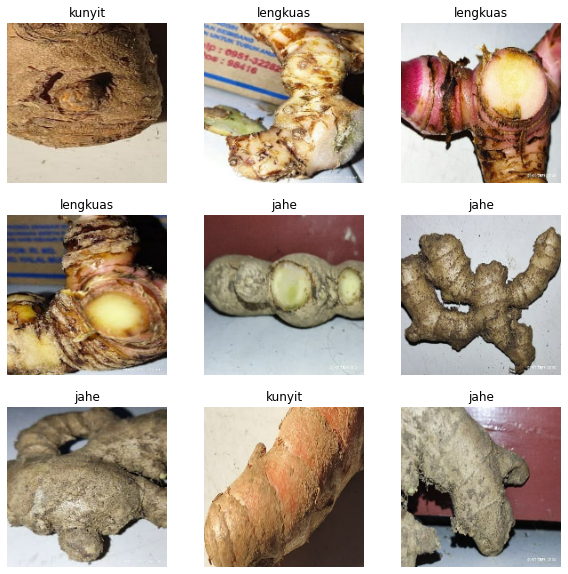

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [25]:
print("Model Training....")

epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Training Complete!")

Model Training....
Epoch 1/25


c:\Users\arfan\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 49s 5s/step - loss: 1.9001 - accuracy: 0.3667 - val_loss: 1.1014 - val_accuracy: 0.3667
Epoch 2/25
8/8 [==============================] - 30s 3s/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0892 - val_accuracy: 0.4000
Epoch 3/25
8/8 [==============================] - 31s 4s/step - loss: 1.0661 - accuracy: 0.4083 - val_loss: 1.0416 - val_accuracy: 0.4167
Epoch 4/25
8/8 [==============================] - 24s 3s/step - loss: 0.9538 - accuracy: 0.6458 - val_loss: 0.9177 - val_accuracy: 0.6500
Epoch 5/25
8/8 [==============================] - 26s 3s/step - loss: 0.6933 - accuracy: 0.8083 - val_loss: 0.9260 - val_accuracy: 0.5833
Epoch 6/25
8/8 [==============================] - 25s 3s/step - loss: 0.5720 - accuracy: 0.7292 - val_loss: 0.7811 - val_accuracy: 0.7000
Epoch 7/25
8/8 [==============================] - 28s 3s/step - loss: 0.3767 - accuracy: 0.8625 - val_loss: 0.7305 - val_accuracy: 0.7500
Epoch 8/25
8/8 [=============================

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

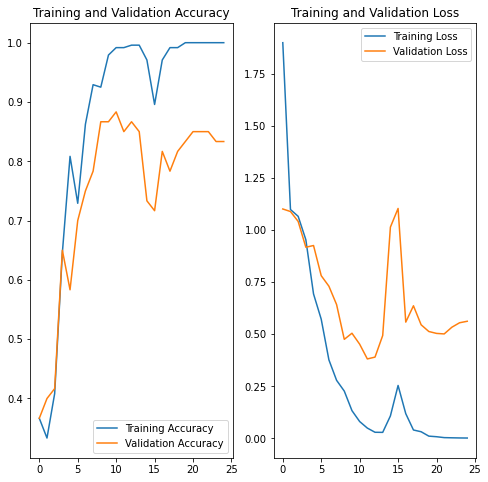

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
save_model(model, 'model.hdf5')
print("Model Saved")

Model Saved
